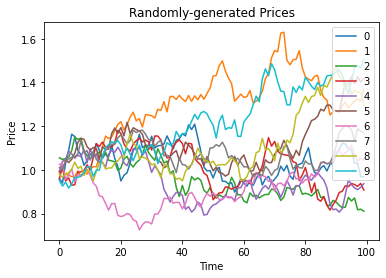

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))  # random df of 10 columns and 100 rows

# Take the average of the last 60 days at each timepoint.
# X is a dataframe column
MAVG = returns[0].rolling(60).mean()

prices = returns.cumprod()  # total return so far at a period. Sums up returns by column over the entire period
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

# on series

In [12]:
s = pd.Series([1, 2, np.nan, 4, 5])  # made a new series
s.name = "Toy Series"  # set the name of the series
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")  # set the index with dates. first row is 2016-01-01. all other rows add a day
s.index = new_index
print(s)

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Toy Series, dtype: float64


Accessing the elements of the series

In [13]:
print(s.iloc[0])  # to access the elements of a series using integer indexing
print(s.iloc[:2])  # can also use slicing
start = 0
end = len(s) - 1
step = 1

print(s.iloc[start:end:step])  # a slice has a beginning, ending, and step
print(s.iloc[::-1])  # to reverse the output

# using datetime indexing
print(s.loc['2016-01-01'])
print(s.loc['2016-01-02':'2016-01-04'])

# boolean indexing
print(s < 3)  # boolean output
print(s.loc[s < 3])  # element output
print(s.loc[(s < 3) & (s > 1)])  # multiple conditions


1.0
2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64
2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64
2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64
1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64
2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool
2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


Indexing with time series using stock data from yahoo finance

In [16]:
import pandas_datareader as pdr

data = pdr.get_data_yahoo('NVDA')

prices = data["Close"]
prices.head()

Date
2017-09-06    41.452499
2017-09-07    41.645000
2017-09-08    40.922501
2017-09-11    42.250000
2017-09-12    42.402500
Name: Close, dtype: float64

In [17]:
prices.index

DatetimeIndex(['2017-09-06', '2017-09-07', '2017-09-08', '2017-09-11',
               '2017-09-12', '2017-09-13', '2017-09-14', '2017-09-15',
               '2017-09-18', '2017-09-19',
               ...
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-29', '2022-08-30', '2022-08-31',
               '2022-09-01', '2022-09-02'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

resampling the data to a new time period

In [21]:
monthly_prices = prices.resample('M').sum()
monthly_prices.head()

Date
2017-09-30     787.052498
2017-10-31    1059.327492
2017-11-30    1104.467506
2017-12-31     965.502499
2018-01-31    1194.580006
Freq: M, Name: Close, dtype: float64

In [22]:
# use a custom resampler
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

Date
2017-09-30    41.452499
2017-10-31    44.750000
2017-11-30    51.799999
2017-12-31    49.419998
2018-01-31    49.837502
2018-02-28    60.125000
2018-03-31    58.052502
2018-04-30    55.262501
2018-05-31    56.785000
2018-06-30    64.404999
Freq: M, Name: Close, dtype: float64

In [24]:
# set the timezone of the series
local_tz = prices.tz_localize('US/Central')

# convert to another timezone
eastern_prices = local_tz.tz_convert('US/Eastern')
eastern_prices.head(10)

Date
2017-09-06 01:00:00-04:00    41.452499
2017-09-07 01:00:00-04:00    41.645000
2017-09-08 01:00:00-04:00    40.922501
2017-09-11 01:00:00-04:00    42.250000
2017-09-12 01:00:00-04:00    42.402500
2017-09-13 01:00:00-04:00    42.592499
2017-09-14 01:00:00-04:00    42.349998
2017-09-15 01:00:00-04:00    45.027500
2017-09-18 01:00:00-04:00    46.887501
2017-09-19 01:00:00-04:00    46.837502
Name: Close, dtype: float64

Can also change the index of the series. For this stock data used in this example does not include weekends or holidays we can instead add them in

In [27]:
# create a new index
start = prices.index[0]
end = prices.index[-1]

calendar_dates = pd.date_range(start=start, end=end, freq='D')
calendar_dates

DatetimeIndex(['2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09',
               '2017-09-10', '2017-09-11', '2017-09-12', '2017-09-13',
               '2017-09-14', '2017-09-15',
               ...
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27',
               '2022-08-28', '2022-08-29', '2022-08-30', '2022-08-31',
               '2022-09-01', '2022-09-02'],
              dtype='datetime64[ns]', length=1823, freq='D')

now to reset the series index. ffill will input dates that current do not have any data with a NAN

In [29]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head()

2017-09-06    41.452499
2017-09-07    41.645000
2017-09-08    40.922501
2017-09-09    40.922501
2017-09-10    40.922501
Freq: D, Name: Close, dtype: float64

Data that is fill in the with NAN can then be filled in.

In [30]:
# filled using the mean of all price days
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2017-09-06    41.452499
2017-09-07    41.645000
2017-09-08    40.922501
2017-09-09    40.922501
2017-09-10    40.922501
2017-09-11    42.250000
2017-09-12    42.402500
2017-09-13    42.592499
2017-09-14    42.349998
2017-09-15    45.027500
Freq: D, Name: Close, dtype: float64

In [32]:
# fill with next filled value, so NAN, NAN, 340 becomes 340, 340, 340
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2017-09-06    41.452499
2017-09-07    41.645000
2017-09-08    40.922501
2017-09-09    40.922501
2017-09-10    40.922501
2017-09-11    42.250000
2017-09-12    42.402500
2017-09-13    42.592499
2017-09-14    42.349998
2017-09-15    45.027500
Freq: D, Name: Close, dtype: float64

In [33]:
# or just remove rows with a NAN
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2017-09-06    41.452499
2017-09-07    41.645000
2017-09-08    40.922501
2017-09-09    40.922501
2017-09-10    40.922501
2017-09-11    42.250000
2017-09-12    42.402500
2017-09-13    42.592499
2017-09-14    42.349998
2017-09-15    45.027500
Freq: D, Name: Close, dtype: float64

Basic time series analysis

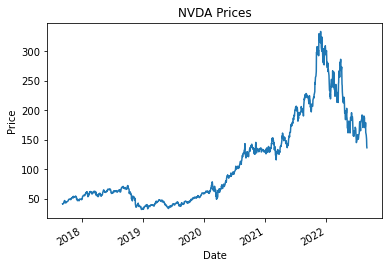

In [34]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title("NVDA Prices")
plt.ylabel("Price")
plt.xlabel("Date");

In [35]:
print(prices.describe())

count    1258.000000
mean      110.170560
std        74.240439
min        31.770000
25%        51.422500
50%        68.157501
75%       154.855003
max       333.760010
Name: Close, dtype: float64


In [36]:
# modify prices, random and non-random
modified_prices = prices * 2 - 10
modified_prices.head(5)

noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2017-09-06     34.899105
2017-09-07    123.374508
2017-09-08     68.684797
2017-09-11     65.176992
2017-09-12     54.457009
dtype: float64

In [37]:
# cannot modify if the indexes do not match
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2017-09-06 00:00:00   NaN
2017-09-07 00:00:00   NaN
2017-09-08 00:00:00   NaN
2017-09-11 00:00:00   NaN
2017-09-12 00:00:00   NaN
dtype: float64

look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case)

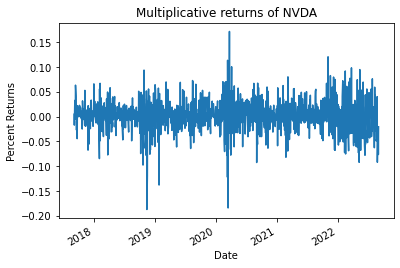

In [38]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

plt.title("Multiplicative returns of NVDA")
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

rolling means and standard deviations,

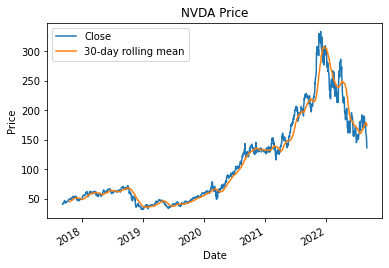

In [41]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

prices.plot()
rolling_mean.plot()
plt.title("NVDA Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

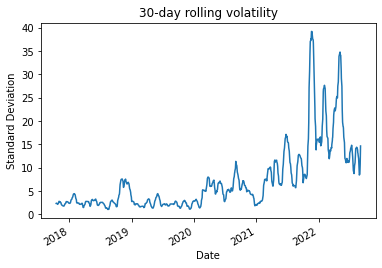

In [42]:
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on Series the same way that they work on 1-dimensional NumPy arrays.

The majority of these functions, however, are already implemented directly as Series and DataFrame methods.

In [44]:
print(np.median(mult_returns))  # numpy

print(mult_returns.median())  # implemented

0.00233879532068193
0.00233879532068193


DataFrames


In [45]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}

frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))

frame_data

,a,b,c
2016-01-01,1,L,0.285840
2016-01-02,2,K,-1.580157
2016-01-03,3,J,-0.964740
2016-01-04,4,M,-1.258915
2016-01-05,5,Z,-0.583526


In [46]:
# combine series into dataframe

s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
numbers

,Evens,Odds
0,2,1
1,4,3
2,6,5
3,8,7
4,10,9


In [47]:
numbers.columns = ['Shmevens', 'Shmodds']
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))

numbers.values


array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

Accessing elements

In [49]:
data.Close.head()

Date
2017-09-06    41.452499
2017-09-07    41.645000
2017-09-08    40.922501
2017-09-11    42.250000
2017-09-12    42.402500
Name: Close, dtype: float64

loc for individual column

In [51]:
data.loc[:, 'Close'].head()

Date
2017-09-06    41.452499
2017-09-07    41.645000
2017-09-08    40.922501
2017-09-11    42.250000
2017-09-12    42.402500
Name: Close, dtype: float64

In [53]:
data.loc[:, ['High', 'Low']].head()

,High,Low
Date,,
2017-09-06,41.950001,41.099998
2017-09-07,41.972500,41.237499
2017-09-08,41.677502,40.677502
2017-09-11,42.357498,41.330002
2017-09-12,42.500000,41.742500


In [54]:
data.loc['2018-12-15':'2018-12-22']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-17,37.037498,35.310001,36.310001,35.895000,66286800.0,35.651699
2018-12-18,37.582500,36.062500,36.337502,36.735001,56437200.0,36.486004
2018-12-19,36.935001,34.107498,36.395000,34.627499,74536400.0,34.392784
2018-12-20,35.450001,33.172501,34.542500,33.775002,74958800.0,33.546062
2018-12-21,34.375000,32.115002,34.042500,32.392502,86374000.0,32.172935


In [57]:
data.loc['2018-12-15':'2018-12-22', ['Close', 'Open']]

,Close,Open
Date,,
2018-12-17,35.895000,36.310001
2018-12-18,36.735001,36.337502
2018-12-19,34.627499,36.395000
2018-12-20,33.775002,34.542500
2018-12-21,32.392502,34.042500


In [58]:
data.iloc[0:2, 1]

Date
2017-09-06    41.099998
2017-09-07    41.237499
Name: Low, dtype: float64

In [64]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3

data.iloc[[1, 3, 5] + [x for x in range(7, 100, 2)], [0, 3]].head(20)

,High,Close
Date,,
2017-09-07,41.972500,41.645000
2017-09-11,42.357498,42.250000
2017-09-13,42.884998,42.592499
2017-09-15,45.027500,45.027500
2017-09-19,47.462502,46.837502
2017-09-21,45.674999,45.189999
2017-09-25,44.450001,42.750000
2017-09-27,44.067501,43.932499
2017-09-29,44.932499,44.692501


Boolean indexing

In [65]:
data.loc[data.Open > data.Close].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-06,41.950001,41.099998,41.810001,41.452499,39767200.0,41.028458
2017-09-08,41.677502,40.677502,41.527500,40.922501,49885600.0,40.503883
2017-09-12,42.500000,41.742500,42.500000,42.402500,41148800.0,41.968742
2017-09-20,47.355000,46.052502,46.875000,46.459999,72492000.0,45.984745
2017-09-21,45.674999,44.402500,45.410000,45.189999,107560000.0,44.727722


We can add multiple boolean conditions by using the logical operators &, |, and ~ (and, or, and not, respectively) again!

In [66]:
data.loc[(data.Open > data.Close) & ~data.Volume.isnull()].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-06,41.950001,41.099998,41.810001,41.452499,39767200.0,41.028458
2017-09-08,41.677502,40.677502,41.527500,40.922501,49885600.0,40.503883
2017-09-12,42.500000,41.742500,42.500000,42.402500,41148800.0,41.968742
2017-09-20,47.355000,46.052502,46.875000,46.459999,72492000.0,45.984745
2017-09-21,45.674999,44.402500,45.410000,45.189999,107560000.0,44.727722


Adding, Removing Columns, Combining DataFrames/Series

In [67]:
data = data.drop('Volume', axis=1)
data.head(5)

,High,Low,Open,Close,Adj Close
Date,,,,,
2017-09-06,41.950001,41.099998,41.810001,41.452499,41.028458
2017-09-07,41.972500,41.237499,41.622501,41.645000,41.218987
2017-09-08,41.677502,40.677502,41.527500,40.922501,40.503883
2017-09-11,42.357498,41.330002,41.384998,42.250000,41.817795
2017-09-12,42.500000,41.742500,42.500000,42.402500,41.968742


If we instead want to combine multiple DataFrames into one, we use the pandas.concat() method.

In [69]:
df_3 = pd.concat([data, prices], axis=1)
df_3.head()

,High,Low,Open,Close,Adj Close,Close
Date,,,,,,
2017-09-06,41.950001,41.099998,41.810001,41.452499,41.028458,41.452499
2017-09-07,41.972500,41.237499,41.622501,41.645000,41.218987,41.645000
2017-09-08,41.677502,40.677502,41.527500,40.922501,40.503883,40.922501
2017-09-11,42.357498,41.330002,41.384998,42.250000,41.817795,42.250000
2017-09-12,42.500000,41.742500,42.500000,42.402500,41.968742,42.402500


Missing data

In [70]:
# fill NAN with 0
filled0_prices = data.fillna(0)
filled0_prices.head(5)

,High,Low,Open,Close,Adj Close
Date,,,,,
2017-09-06,41.950001,41.099998,41.810001,41.452499,41.028458
2017-09-07,41.972500,41.237499,41.622501,41.645000,41.218987
2017-09-08,41.677502,40.677502,41.527500,40.922501,40.503883
2017-09-11,42.357498,41.330002,41.384998,42.250000,41.817795
2017-09-12,42.500000,41.742500,42.500000,42.402500,41.968742


In [71]:
bfilled_prices = data.fillna(method='bfill')
bfilled_prices.head(5)

,High,Low,Open,Close,Adj Close
Date,,,,,
2017-09-06,41.950001,41.099998,41.810001,41.452499,41.028458
2017-09-07,41.972500,41.237499,41.622501,41.645000,41.218987
2017-09-08,41.677502,40.677502,41.527500,40.922501,40.503883
2017-09-11,42.357498,41.330002,41.384998,42.250000,41.817795
2017-09-12,42.500000,41.742500,42.500000,42.402500,41.968742


In [72]:
# fill data with value ahead of NAN. So NAN, 340 becomes 340, 340
dropped_prices = data.dropna()
dropped_prices.head(5)

,High,Low,Open,Close,Adj Close
Date,,,,,
2017-09-06,41.950001,41.099998,41.810001,41.452499,41.028458
2017-09-07,41.972500,41.237499,41.622501,41.645000,41.218987
2017-09-08,41.677502,40.677502,41.527500,40.922501,40.503883
2017-09-11,42.357498,41.330002,41.384998,42.250000,41.817795
2017-09-12,42.500000,41.742500,42.500000,42.402500,41.968742


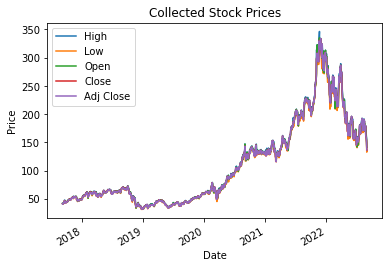

In [73]:
data.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

In [74]:
data.mean(axis=0)

High         112.274839
Low          107.949463
Open         110.206359
Close        110.170560
Adj Close    109.930635
dtype: float64

In [75]:
data.std(axis=0)

High         76.027392
Low          72.426214
Open         74.371403
Close        74.240439
Adj Close    74.334555
dtype: float64

In [76]:
data.describe()

,High,Low,Open,Close,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,112.274839,107.949463,110.206359,110.170560,109.930635
std,76.027392,72.426214,74.371403,74.240439,74.334555
min,32.494999,31.115000,31.622499,31.770000,31.554659
25%,52.266251,50.092499,51.145624,51.422500,50.973230
50%,69.512497,67.195000,68.417503,68.157501,67.660088
75%,157.487499,152.244995,155.197495,154.855003,154.724384
max,346.470001,320.359985,335.170013,333.760010,333.591797


We can scale and add scalars to our DataFrame, as you might suspect after dealing with Series. This again works element-wise

In [77]:
(2 * data - 50).head(5)

,High,Low,Open,Close,Adj Close
Date,,,,,
2017-09-06,33.900002,32.199997,33.620003,32.904999,32.056915
2017-09-07,33.945000,32.474998,33.245003,33.290001,32.437973
2017-09-08,33.355003,31.355003,33.055000,31.845001,31.007767
2017-09-11,34.714996,32.660004,32.769997,34.500000,33.635590
2017-09-12,35.000000,33.485001,35.000000,34.805000,33.937485


Here we use the pct_change() method to get a DataFrame of the multiplicative returns of the securities that we are looking at.

In [78]:
mult_returns = data.pct_change()[1:]
mult_returns.head()

,High,Low,Open,Close,Adj Close
Date,,,,,
2017-09-07,0.000536,0.003346,-0.004485,0.004644,0.004644
2017-09-08,-0.007028,-0.013580,-0.002282,-0.017349,-0.017349
2017-09-11,0.016316,0.016041,-0.003432,0.032439,0.032439
2017-09-12,0.003364,0.009981,0.026942,0.003609,0.003610
2017-09-13,0.009059,0.001857,-0.008294,0.004481,0.004481


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

<AxesSubplot:xlabel='Date'>

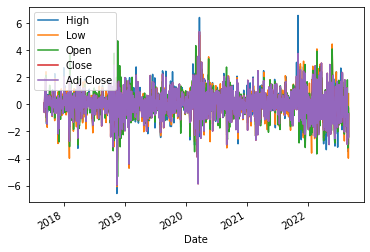

In [79]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.plot()

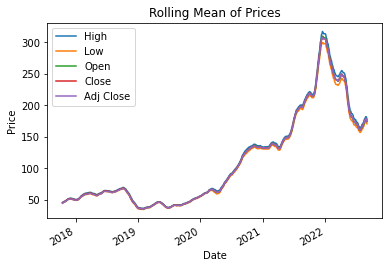

In [81]:
rolling_mean = data.rolling(30).mean()
rolling_mean.columns = data.columns

rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();